# Final Exam - DS 3000B 2022

## Student ID: XXXXXXXXX

## General comments

This Final integrates knowledge and skills acquired during the whole semester. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the exam.** To finish the exam in the alloted 4 hrs, you will have to work efficiently. **Read the entirety of each question carefully.**

You need to submit the final by the due date (13:00) on OWL in the Test & Quizzes / Final section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at the latest ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded.  

Most question demand a **written answer** - answer these in a full English paragraph. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [2]:
# Install UMAP, SHAP and yellowbrick if needed
!pip install umap-learn shap yellowbrick

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/68/0f/877e25ac7c5f9c24db18232da80d36b5f3f104f429b819999d9740a07e9a/shap-0.44.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
   --------------- ------------------------ 174.1/448.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 317.4/448.0 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 448.0/448.0 kB 3.1 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.
# You should not need any other packages.   

# Basics
import pandas as pd
import numpy as np

# Models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# tensorflow
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers

# Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# UMAP
import umap

# Shap
import shap

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set

You are given a dataset, `bank_data.csv`, which includes details of a bank's clients and the target variable is a binary variable reflecting whether the client closed their account or they continued to be with the bank (a phenomenon known as **churn**). Banks spend a large amount of resources in keeping their customers, as retaining a customer is much cheaper than capturing a new customer (try to cut your internet and see what happens!). The following variables are given in the dataset:

1. Credit_Score: Credit score of the client.
2. Age: Age of the client.
3. Tenure: Number of years for which the client has been with the bank.
4. Balance: Bank balance of the client.
5. Number_of_Products: Number of bank products the client is using.
6. Has_Credit_Card (binary): 1 if the client has a credit card with the bank, 0 otherwise.
7. Active_Member (binary): 1 if the client is an active member, 0 otherwise.
8. Estimated_Salary: Estimated salary of the client.
9. Closed_Account (binary, target variable): 1 if the client closed their account, 0 otherwise.

With this information, execute the following tasks using your knowledge from the course.

In [ ]:
# Download the data if using online platforms
#!gdown https://drive.google.com/uc?id=1Ng3J8joHC7xlGAKyvEtHpXrBzszTu7OZ

## Task 1 (35 points UG, 25 points PG)
Before we start working on a predictive models for whether somebody will leave the company or not, in task 1 we will first build a model to predict the typical credit score of a person given other data. This can be useful as it may be a company wants to target customers within a certain range of risk, or because obtaining the credit scores for all customers may not be cost-effective.

### Question 1.1 (20% of task's points):
a. Import the dataset and report the data shape. Are there any null values?

b. Present the descriptive statistics of the variables.

c. Create a distribution plot that shows both the KDE and the histogram of the ```Credit_Score``` variable. **Written answer: What distribution does this variable have?**

Shape: (10000, 9)
Are there any nulls? False
       Credit_Score           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       Number_of_Products  Has_Credit_Card  Active_Member  Estimated_Salary  \
count        10000.000000      10000.00000   10000.000000      10000.000000   
mean             1.530200          0.70550       0.515100     100090.239881   
std              0.581654          0.45584       0.499797      57510.492818   
min              1.000000          0.00000  

<Axes: >

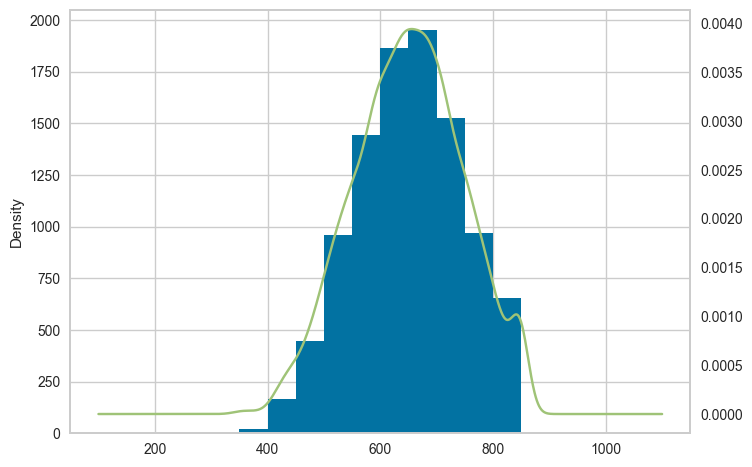

In [10]:
# Your code here. You can add as many cells as you want.

df = pd.read_csv("bank_data.csv")

print(f"Shape: {df.shape}")

print(f"Are there any nulls? {df.isnull().any().any()}")

print(df.describe())

ax = df['Credit_Score'].plot(kind='hist')
df['Credit_Score'].plot(kind='kde', ax=ax, secondary_y=True)

**Written answer here**

### Question 1.2 (20% of task's points):
a. Define X (predictors) and y (target) for your problem. Your target corresponds to the ```Credit_Score``` variable 

b. Split the data into X_train, X_test, y_train, y_test with `test_size = 0.3` and `random_state = 2022`. Do not use ```Credit_Score```as a predictor in your model.

c. Apply a `MinMaxScaler` to both the training and the test data (X_train, X_test).

In [12]:
# Your code here. You can add as many cells as you want.

X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Question 1.3 (60% of task's points)

Now we will train a couple of models and study their behaviour. 

a. Train an unregularized linear regression and calculate the MSE error over the test set. Show the coefficients and the variable they refer to.

b. Now train a Ridge model, tuning the alpha value between 0 and 1000 in intervals of 50. Use five crossvalidation folds over the train set using a ```KFold``` object with a random seed of 2022 and ```shuffle=True```, you can use ```RidgeCV``` if desired. Show the optimal alpha value, the trained coefficients, and the variables they refer to.

c. Create a jointplot of the two predictions over the test set (a scatterplot of the prediction of the model in a and the model in b).  **Written answer: Where are performances different?**.

d. Using a normal approximation, calculate the CI for the test set error (squared residuals). **Written answer: Which model performs best? Why do you think this happens? Why can you use a normal approximation for this error? Which model would you use?**

In [14]:
# Your code here. You can add as many cells as you want.

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(f"MSE: {mean_squared_error(y_test, linreg.predict(X_test))}")

MSE: 9411.147642625163


**Written answer here.**

In [ ]:
# Your code here. You can add as many cells as you want.

**Written answer here**

## Task 2: Tree-based ensemble (35 pts UG, 30 PG)

In the second question, we will now study the impact of interaction terms (i.e. if you have two variables $x_1$ and $x_2$, adding the multiplication of the terms $x_1 \cdot x_2$) in XGB models. While XGB is a non-linear model, interactions may help to determine more complex relationships.

First, let's reimport the data and create a new dataset.

### Question 2.1 Data Import (10% of task's points)

a. Reimport the data and separate the target variable (```Closed_Account```) from the input variables (the remaining ones). For the rest of the final, ```credit_score``` will be used as one of the predictors, so be sure to include it.

b. Use a ```PolynomialFeatures``` object to create the interactions terms only (i.e. set ```interaction_only=True```). Do not include the biases in the polynomial object either.

c. Generate a train/test split using 70% for training and the remaining for testing. Use a random seed of 2022.

In [ ]:
# Your code here. You can add as many cells as you want.


### Question 2.2 (30% of task's points)

Now train an XGB model using only the original variables without interaction. *Hint: The variables are ordered so that the first ones are the original ones and the remaining ones the interactions. You can see the variable names by running ```poly_transformer.get_feature_names_out()``` after you fit it, with ```poly_transformer``` the name of your ```PolynomialFeatures``` object.*

a. Tune the parameters using the following grid:

```
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3],
                 'learning_rate' : [0.001, 0.01, 0.1]
                  })
```                  
Use a ```GridCV``` object with a ```StratifiedKFold``` as input using 3 folds and ```shuffle=False```. Remember to set the ```scale_pos_weight``` Parameter to an appropriate value. Report the best parameters.

b. Calculate AUC and plot the ROC curve for the model.

c. Plot the SHAP variable importance (beeswarm plot) for the output variables.

**Written answer: Analyze the beeswarm plot. What can you see? How do the variables relate to the output? Analyze the distribution of the top three variables.**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here.**

### Question 2.3 Interactions and conclusion (60% of task's points)

Now do the same again, but now use all the training variables, including interactions.

a. Tune the parameters using the same ranges as the previous question. **Written answer: How do the parameters change between the previous model and this one? Why do you think that is?**

b. Calculate AUC and plot the ROC curve for the model. **Written answer: Compare the prediction capabilities of the two models. What impact do the interactions have on the prediction?**

c. Plot the SHAP variable importance (beeswarm plot) for the output variables. **Written answer: Analyze the top three resulting variables and compare them with the previous plot if they were available.**

d. **Written answer: Conclude on our original question, comparing the trade-off between interpretability and performance. Do interactions help? Is a non-linear model like XGB able to automatically construct interactions or is it worth it to add them yourself? Why do you think this is?**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here.**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here.**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here.**

## Task 3: Unsupervised learning (30 pts UG, 20 PG)

In the previous questions, we could see there seem to be clear groups within our data. In this question we will study whether this is true or not.

### Question 3.1 (10% of task's points)

Reimport the data once more and normalize them using a MinMaxScaler. Use all variables as input.

In [ ]:
# Your code here. You can add as many cells as you want.


### Question 3.2 K-Means (60% of task's points)

Run a K-Means algorithm testing between 2 and 8 groups. Use a seed of 2022 for all objects that accept it. Plot both the silhouette plots and the elbow plots.

**Written answer: How many clusters do think are in the data?**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here**

### Question 3.3 (30% of task's points)

Now create a UMAP projection of the data to two dimensions, using 15 nearest neighbours, min_dist of 0.1, spread of 1, an appropriate distance metric, and a random seed of 2022, and plot the resulting scatterplot differentiating the clusters using the cluster membership as colouring. Use the number of clusters you found using the **elbow method**.

**Written answer: Justify the metric you used. What can you see in the plot? What can you say about the clusters?**

In [ ]:
# Your code here. You can add as many cells as you want.



**Written answer here.**

## Task 4 (Graduate students only, optional for UG): Neural Networks (25 pts)

### Question 4.1 Preparing the data. (5 pts)

In order to train a neural network, you need to first normalize the data and then create the iterator for the training set. Reimport the data, split it in a training and testing set using ```Closed_Account``` as a target variable and a seed of 2022, and finally standardize the data using a ```StandardScaler``` method.

In [ ]:
# Your code here. You can add as many cells as you want.


### Question 4.2 (15 pts):
Now you are ready to create your architecture. You want to create a dense structure with three hidden layers. Create an architecture with the following properties:

- The number of inputs to the network is the number of columns in X_train.
- Numbers of neurons for first, second, and third hidden layers are 10, 20, and 6, respectively.
- Hidden layers with `relu` activation function.
- Apply Dropout regularization with rate of 0.2 after each hidden layer.
- Output layer has `sigmoid` activation function with one neuron (as it is a binary problem).
- Use `adam` for optimizer, `binary_crossentropy` for loss, and `accuracy` for metrics.
- Train the model with 100 epochs with a batch size of 128. Use a validation split of 30%. Balance the sample using the argument class_weight in your fit call (see [here](https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras) for help)

Plot the training history of the model. **Written answer: How many epochs it takes to converge? Do you see overfitting?**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here.**

### Question 4.3 (5 pts)
a. Now it is time to evaluate the model. Find the accuracy for both training and test set.

b. Make a confusion matrix for the test set and display it as a heatmap.

c. Plot the ROC curve for the test set and display the AUC value. **Written answer: How does it compare to the AUC of the XGB model? Why do you think this is?**

In [ ]:
# Your code here. You can add as many cells as you want.


**Written answer here.**

**You are done! Remember to re run your notebook to confirm your results and submit within the given time!**